In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [5]:
# filename = ['1.csv', '2.csv', '3.csv', '4.csv', '5.csv']
filename = ['0912-500M.csv']
exec_time_dfs = []
for i, name in enumerate(filename):
    exec_time_df = pd.read_csv("../" + name)
    print("df loaded")
    not_arr = [0, 210, 215, 220, 225, 230, 235, 236,240, 242, 245, 248, 249, 250, 252]
    exec_time_df = exec_time_df[~exec_time_df['prio'].isin(not_arr)]
    exec_time_df.sort_values(by='prio', inplace=True)
    exec_time_df.dropna(inplace=True)
    exec_time_dfs.append(exec_time_df)
prios = exec_time_dfs[0]['prio'].drop_duplicates()
prios = np.array(prios)
prios

In [3]:
hm_dfs = []
for i in range(len(filename)):
    hm_df = exec_time_dfs[i][exec_time_dfs[i]['tm'].isin(['hit', 'miss'])]
    hm_dfs.append(hm_df)
hm_dfs[0]

,prio,tm,round
16179852,3,hit,37936.0
16179830,3,hit,37935.0
16179806,3,hit,37934.0
16179910,3,hit,37937.0
16179784,3,hit,37933.0
...,...,...,...
24758568,253,hit,8402.0
18067483,253,hit,38003.0
39774166,253,hit,6002.0
25633154,253,hit,38803.0


In [4]:
tm_dfs = []
for i in range(len(filename)):
    tm_df = exec_time_dfs[i][~exec_time_dfs[i]['tm'].isin(['hit', 'miss'])]
    tm_df['tm'] = tm_df['tm'].astype(int)
    tm_dfs.append(copy.deepcopy(tm_df))

ValueError: cannot convert float NaN to integer

In [18]:
# threshold = [535, 2063, 406, 541, 580, 495, 873, 524, 178, 716, 208, 449, 468, 534, 536, 1607, 1330, 1074, 354, 231, 477, 378, 542, 280, 146, 348, 378, 274, 251, 532, 720, 521, 151, 2, 513, 286, 72, 278, 276, 355, 455,312, 200, 826, 3593]
periods = [20000, 2500, 20000, 5000, 2500, 2500, 20000, 100000, 20000, 20000, 50000, 20000, 100000, 100000, 100000, 100000, 2500, 2500, 142857, 100000, 100000, 20000, 100000, 2500, 100000, 20000, 20000, 100000, 100000, 100000, 333333, 1000000, 333333, 10000000, 20000, 2500, 10000000, 200000, 1000000, 100000, 20000, 20000, 20000, 2500, 1000000]

In [19]:
len(periods)

45

In [20]:
len(prios)

45

In [21]:
def n_k_analysis_window(arr, n, k):
    tot = len(arr) - n + 1
    hit = 0
    result_arr = []
    for i in range(tot):
        if np.sum(arr[i:i+n]) >= k:
            hit += 1
            result_arr.append(1)
        else:
            result_arr.append(0)
    return hit / tot, result_arr

In [37]:
# deadline miss rate
for idx, prio in enumerate(prios):
    dfidx = hm_dfs[0][hm_dfs[0]['prio'] == prio]
    hit_rate = float((dfidx[dfidx['tm'] == 'hit']['tm'].count()) / dfidx['tm'].count())
    if hit_rate < 1:
        print(prio, 1-hit_rate)


6 0.00032719711914352967
11 6.848637501621901e-05
12 0.0006753453297492218
15 0.0008636827126485835
51 0.0015485441972395986
54 0.002022246615162482
70 0.0031598792359217587
75 1.0146773072539084e-05
78 7.610350076125982e-06
111 0.010895020098810382
205 0.030837834084462612


In [42]:
# (n,k)
n, k = 5,5
for idx, prio in enumerate(prios):
    dfidx = hm_dfs[0][hm_dfs[0]['prio'] == prio]
    dfidx['tm'] = dfidx['tm'].replace({"hit" : 1, "miss": 0})
    hit_rate, _ = n_k_analysis_window(dfidx['tm'], n, k)
    if (hit_rate < 1):
        print(f"{prio}\t{1-hit_rate}")



3	1.0


/tmp/ipykernel_706/1033441663.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfidx['tm'] = dfidx['tm'].replace({"hit" : 1, "miss": 0})


6	0.0015979515782624798
11	0.00034243708669745576
12	0.003332997243428615
15	0.004238545653778569
51	0.0075829780595870755
54	0.009941995514116786
70	0.015556007906416647
75	5.073489495344141e-05
78	3.805290876435219e-05
111	0.05307343873953907
205	0.14588061615260373


In [35]:
# (n,k)
n, k = 100, 95
for idx, prio in enumerate(prios):
    dfidx = hm_dfs[0][hm_dfs[0]['prio'] == prio]
    dfidx['tm'] = dfidx['tm'].replace({"hit" : 1, "miss": 0})
    hit_rate, _ = n_k_analysis_window(dfidx['tm'], n, k)
    if 0 < hit_rate < 1:
        print(prio,1-hit_rate)

/tmp/ipykernel_706/2297406161.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfidx['tm'] = dfidx['tm'].replace({"hit" : 1, "miss": 0})


15 8.372070013340505e-05
70 0.00013319278323442596
111 0.0012158598355259675
205 0.08065774401869263


In [34]:
# (n,k)
n, k = 100, 98
for idx, prio in enumerate(prios):
    dfidx = hm_dfs[0][hm_dfs[0]['prio'] == prio]
    dfidx['tm'] = dfidx['tm'].replace({"hit" : 1, "miss": 0})
    hit_rate, _ = n_k_analysis_window(dfidx['tm'], n, k)
    if 0 < hit_rate < 1:
        print(prio,1-hit_rate)

/tmp/ipykernel_706/3373403964.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfidx['tm'] = dfidx['tm'].replace({"hit" : 1, "miss": 0})


6 0.00032345341699990815
12 0.00047949037023509167
15 0.000742069842091353
51 0.0013832969274444329
54 0.0026124813054414497
70 0.0052382818892063865
111 0.09623749414903127
205 0.6080840408407129


In [36]:
# (n,k)
n, k = 100, 90
for idx, prio in enumerate(prios):
    dfidx = hm_dfs[0][hm_dfs[0]['prio'] == prio]
    dfidx['tm'] = dfidx['tm'].replace({"hit" : 1, "miss": 0})
    hit_rate, _ = n_k_analysis_window(dfidx['tm'], n, k)
    # if 0 < hit_rate < 1:
    print(prio,1-hit_rate)

3 1.0


/tmp/ipykernel_706/3777585881.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfidx['tm'] = dfidx['tm'].replace({"hit" : 1, "miss": 0})


6 0.0
9 0.0
11 0.0
12 0.0
15 0.0
18 0.0
21 0.0
24 0.0
27 0.0
30 0.0
36 0.0
39 0.0
41 0.0
45 0.0
48 0.0
51 0.0
54 0.0
57 0.0
60 0.0
63 0.0
66 0.0
69 0.0
70 0.0
72 0.0
75 0.0
78 0.0
81 0.0
84 0.0
87 0.0
90 0.0
96 0.0
99 0.0
105 0.0
108 0.0
111 0.0
114 0.0
117 0.0
120 0.0
123 0.0
126 0.0
180 0.0
200 0.0
205 0.00023403874768335164
253 0.0


In [25]:
def ecdf(data):
    """Compute the empirical cumulative distribution function."""
    sorted_data = np.sort(data)
    n = len(data)
    return sorted_data, np.arange(1, n+1) / n

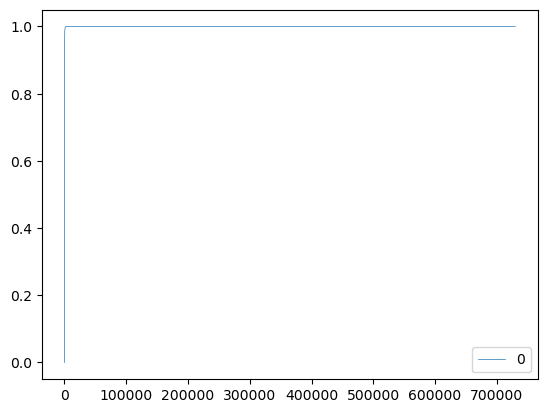

In [26]:
# The cdf for task.prio==6
prio = 6
for i in range(len(filename)):
    dfidx = tm_dfs[i][tm_dfs[i]['prio'] == prio]['tm'].to_numpy()
    x, y = ecdf(dfidx)
    plt.plot(x,y,label=f"dataset {i}",lw=0.5)

plt.legend()
plt.legend([0,3000])


(0.0, 500.0)

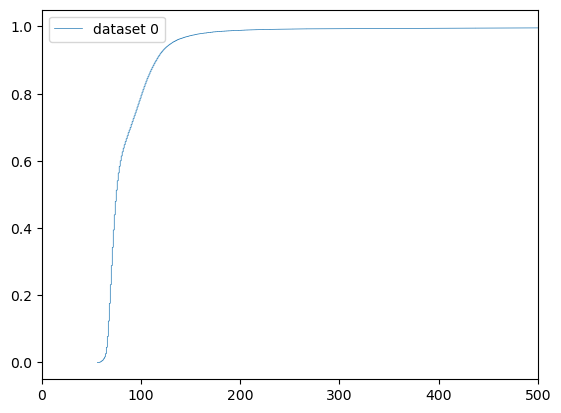

In [27]:
# The cdf for task.prio==6
prio = 9
for i in range(len(filename)):
    dfidx = tm_dfs[i][tm_dfs[i]['prio'] == prio]['tm'].to_numpy()
    x, y = ecdf(dfidx)
    plt.plot(x,y,label=f"dataset {i}",lw=0.5)

plt.legend()
plt.xlim([0,500])


(0.0, 500.0)

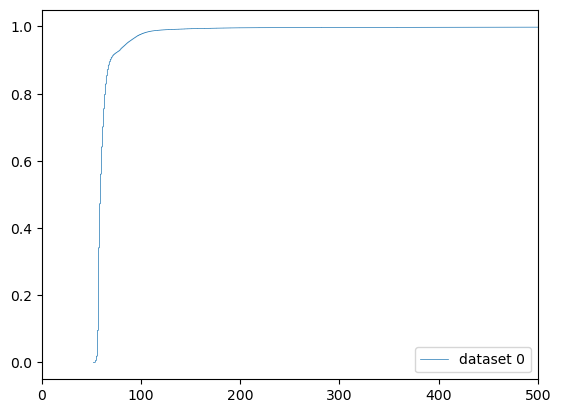

In [29]:
# The cdf for task.prio==6
prio = 111
for i in range(len(filename)):
    dfidx = tm_dfs[i][tm_dfs[i]['prio'] == prio]['tm'].to_numpy()
    x, y = ecdf(dfidx)
    plt.plot(x,y,label=f"dataset {i}",lw=0.5)

plt.legend()
plt.xlim([0,500])


In [30]:
with open("tasks/prios.txt", 'w') as f:
    f.write(f"{prios.tolist()}\n")

In [32]:
pers_idx = np.arange(1, 10001) / 100
for idx, prio in enumerate(prios):
    pers_all = []
    for i in range(len(filename)):
        dfidx = tm_dfs[i][tm_dfs[i]['tm'] < periods[idx]]
        dfidx = dfidx[dfidx['prio'] == prio]['tm'].to_numpy()
        pers = np.percentile(dfidx, pers_idx)
        pers_all.append(pers)
    pers_max = np.mean(np.array(pers_all), axis=0)
    with open(f"tasks/{prio}.txt", 'w') as f:
        f.write(f"{periods[idx]}\n")
        f.write(f"{pers_max.tolist()}")

### iid analysis

In [25]:
def num_turning_points(arr):
    trend = (arr[1] - arr[0])
    tp = 0
    for i in range(2, len(arr)):
        if arr[i] >arr[i-1]:
            if trend < 0:
                tp += 1
            trend = 1
        elif arr[i] < arr[i-1]:
            if trend > 0:
                tp+=1
            trend = -1
           
    return tp

In [27]:
for idx, prio in enumerate(prios):
    pers_all = []
    for i in range(len(filename)):
        dfidx = tm_dfs[i][tm_dfs[i]['tm'] < periods[idx]]
        dfidx = dfidx[dfidx['prio'] == prio]['tm'].to_numpy()
        print(prio, num_turning_points(dfidx), len(dfidx) * 2/3)


3 12282 16164.0
6 16158 16151.333333333334
9 2007 2019.3333333333333
11 7965 8080.0
12 15953 16142.0
15 15876 16135.333333333334
18 1971 2019.3333333333333
21 404 403.3333333333333
24 1916 2019.3333333333333
27 1930 2019.3333333333333
30 802 807.3333333333334
36 1970 2019.3333333333333
39 392 403.3333333333333
41 393 403.3333333333333
45 390 403.3333333333333
48 399 403.3333333333333
51 15591 16110.0
54 15904 16092.0
57 268 283.3333333333333
60 401 403.3333333333333
63 382 403.3333333333333
66 1903 2019.3333333333333
69 389 403.3333333333333
70 15551 16054.0
72 387 403.3333333333333
75 5591 6058.666666666667
78 3904 4038.6666666666665
81 376 403.3333333333333
84 390 403.3333333333333
87 394 403.3333333333333
90 108 120.66666666666667
96 31 40.0
99 118 120.66666666666667
105 2 3.3333333333333335
108 1935 2019.3333333333333
111 15340 15828.0
114 2 3.3333333333333335
117 184 201.33333333333334
120 36 40.0
123 379 403.3333333333333
126 1969 2019.3333333333333
180 1903 2019.3333333333333
20

In [32]:
import statsmodels.api as sm

In [38]:
# The closer p_value is to 1.0, the closer the distribution is to i.i.d.
for idx, prio in enumerate(prios):
    for i in range(len(filename)):
        try:
            dfidx = tm_dfs[i][tm_dfs[i]['tm'] < periods[idx]]
            dfidx = dfidx[dfidx['prio'] == prio]['tm'].to_numpy()
            z = sm.stats.diagnostic.acorr_ljungbox(dfidx, 10)
            print(prio ,z)
            print()
        except Exception as e:
            print(e)

3        lb_stat     lb_pvalue
1    19.604924  9.522350e-06
2    19.656221  5.391452e-05
3    33.157751  2.983111e-07
4    41.958858  1.701242e-08
5    47.785654  3.928364e-09
6    52.655549  1.376425e-09
7    53.063661  3.601385e-09
8    65.290737  4.227595e-11
9   146.069167  5.743961e-27
10  154.145297  5.223880e-28

6       lb_stat  lb_pvalue
1    0.099337   0.752627
2    0.107332   0.947749
3    1.062490   0.786136
4    7.186479   0.126356
5    7.237710   0.203553
6   14.913500   0.020940
7   19.936123   0.005709
8   26.679681   0.000803
9   29.929998   0.000451
10  36.694542   0.000064

9      lb_stat  lb_pvalue
1   0.128542   0.719949
2   0.380324   0.826825
3   0.554400   0.906787
4   0.595208   0.963595
5   0.941003   0.967183
6   1.300052   0.971655
7   1.363252   0.986670
8   1.724905   0.988316
9   1.880007   0.993226
10  1.893578   0.997093

11       lb_stat  lb_pvalue
1    0.801946   0.370512
2    0.833102   0.659317
3    1.554726   0.669698
4    2.121015   0.713513
5    